In [55]:
import numpy as np
from numpy.random import random
from numpy.random import randint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

a = 5.204         # semi major axis (units of AU)
e = 0.0489        # eccentricity 
G = 4*(np.pi**2)  # gravitational constant (units of M_sun, AU and year)
M_sun = 1.       # solar mass 
M_j =1/1047.*M_sun # fraction of M_sun
h=0.01


def symplectic_jupiter(time,h):
    '''This function applies the Euler-Cromer (or Symplectic Integrator) method for solving differntial equations'''
    # position and velocity arrays 
    n = int(time/h)  
    r = np.zeros((3,n))
    v = np.zeros((3,n))
    radius = np.zeros(n)
    accel_sun=np.zeros(n)
    
    r[0][0] = 0.0
    r[1][0] = a*(1-e)
    r[2][0] = 0.0
    v[0][0] = -np.sqrt((G*M_sun/a) * (1+e)/(1-e))
    v[1][0] = 0.0
    v[2][0] = 0.0
    
    for t in range(n-1):
        radius[t] = np.sqrt( r[0][t]**2 + r[1][t]**2)
        accel_sun[t]= -G*M_sun/(radius[t]**3)
        
        for dim in range(2):
            v[dim][t+1] =  v[dim][t] + h*accel_sun[t]*r[dim][t]
            r[dim][t+1] =  r[dim][t] + h*v[dim][t+1] 
         
    return r,v


def symplectic_astroid(time,h):
    '''This function applies the Euler-Cromer (or Symplectic Integrator) method for solving differntial equations'''
    n = int(time/h)  
    r = np.zeros((3,n))
    v = np.zeros((3,n))
    radius = np.zeros(n)
    radius_j = np.zeros(n)
    accel_sun = np.zeros(n)
    accel_j = np.zeros(n)
    
    radius0 = np.random.uniform(1.0,3.5)
    theta0 = np.random.uniform(0.0,2*np.pi)
    
    r[0][0] = radius0*np.cos(theta0)
    r[1][0] = radius0*np.sin(theta0)
    r[2][0] = 1/2000.*radius0*np.sin(theta0)
    v[0][0] = -np.sqrt(G/radius0 *(1+e)/(1-e))*np.sin(theta0)
    v[1][0] = np.random.uniform(0.0,2*np.pi)
    v[2][0] = 0.0#0.000001
    
    for t in range(0,n-1):
        radius[t] = np.sqrt( r[0][t]**2 + r[1][t]**2 + r[2][t]**2)
        
        
        if (radius[t] < 1.0 or radius[t] > 5) :
            r = np.delete(r, (0,1,2), axis=0)
            v = np.delete(v, (0,1,2), axis=0)
            break
        
        radius_j[t] = np.sqrt( (r[0][t]-r_j[0][t])**2 + (r[1][t]-r_j[1][t])**2 +r[2][t]**2)

        accel_j[t] = -G*M_j/(radius_j[t]**3)  
        accel_sun[t]= -G*M_sun/(radius[t]**3)        
        
        v[:,t+1] =  v[:,t] + h* ( accel_j[t]*(r[:,t] - r_j[:,t]) + accel_sun[t]*r[:,t] )
        r[:,t+1] =  r[:,t] + h * v[:,t+1]    
    #print(radius[-2])  
    
    return r, v, radius[-2] # -2 to get last radius (at end of time)

# def plotting(time,h,number=1,zoom=6.0):
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
    
#     ax.plot(*r_j)
    
#     for i in range(number):
#         r_as, v_as, rad_as = symplectic_astroid(time,h)
# #        print(rad_as)
#         if (r_as.any() == True) :
#             ax.plot(*r_as)
# #            r_as = np.reshape(r_as, (int(3*time/h),1))
#     x = rad_as[0][:]
#     y = r_as[1][:]
#     z = r_as[2][:]
#     np.savetxt('asteroidData.txt', np.c_[r_as[0], y, z, radius])
    
#     ax.set_xlabel("x position", fontsize=16)
#     ax.set_ylabel("y position",fontsize=16)
#     ax.legend(loc = 'best', fontsize = 15)
#     ax.set_title("time= " + str(time) + ", h= " +str(h))
#     ax.set_aspect('equal','datalim')
#     ax.set_xlim(-zoom,zoom)
#     ax.set_ylim(-zoom,zoom)
#     ax.set_zlim(-0.1,0.1)
#     plt.show()
    
# years = 50.
# timestep = 1/365.
# numberOfAsteroids = 50.
# r_j, v_j =symplectic_jupiter(years,timestep)
# plotting(years,timestep, number=numberOfAsteroids, zoom=10)



# print("end of code")

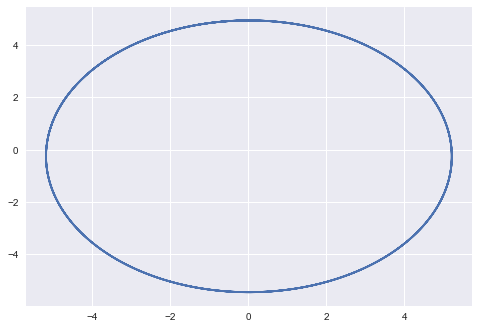

In [41]:
jup_pos = symplectic_jupiter(50,0.01)[0][0]
jup_vel = symplectic_jupiter(50,0.01)[0][1]

plt.plot(jup_pos,jup_vel)
plt.show()

# print symplectic_jupiter(100,0.01)[1]


In [56]:
print symplectic_astroid(10,0.1)

(array([], shape=(0, 100), dtype=float64), array([], shape=(0, 100), dtype=float64), 0.0)
